## About
This notebook generates Fig. S2, providing a per-sequence overview of the overall chemistry in an at-a-glance format

## Dependencies
It requires `numpy`, `pandas`, `matplotlib`, and our FASTA sequence reading package [protfasta](https://github.com/holehouse-lab/protfasta)

## Data
The `synthetic_idrs.fasta` file was uploaed to [JPRED4](https://www.compbio.dundee.ac.uk/jpred/) which was run in batch mode. The resulting zip file was downloaded and then the per-residue helical probabilities extacted using the follwing `zsh` script to build single files with per-residue helical probabilities:


    # simple script to extract out helicity scores
    #!/bin/zsh
    
    for i in jp_*
    do
        cd $i
        cat ${i}.jnet | grep JNETPROPH | awk -F ":" {' print $2 '} > helicity_scores.csv
        cd ..
    done


In [33]:
import protfasta
from sparrow import Protein
from matplotlib import pyplot as plt

In [34]:
seqs = protfasta.read_fasta('../synthetic_idrs.fasta')

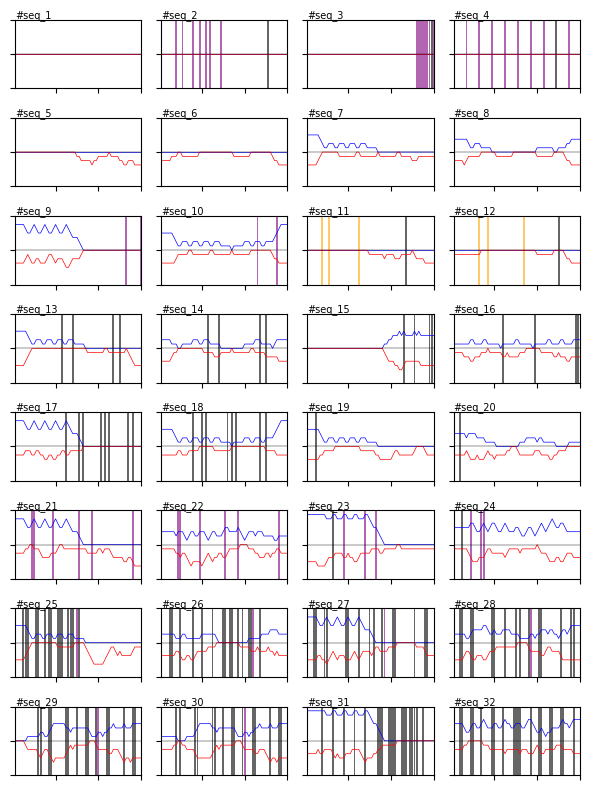

In [35]:


fig, axs = plt.subplots(8, 4, sharex=True, sharey=True, figsize=(6, 8))

global_idx = 0
residue_ix = np.arange(1,61)

average_helicity_jpred = {}

for i in range(8):
    for j in range(4):

        idx = f"seq_{global_idx+1}"
        
        P = Protein(seqs[idx])
        
        pos = P.linear_composition_profile('RK')
        neg = -np.array(P.linear_composition_profile('EK'))
        aro = 2*np.array(P.linear_composition_profile('YFW',window_size=1))
        pro = 2*np.array(P.linear_composition_profile('P',window_size=1))
        ali = 2*np.array(P.linear_composition_profile('AILVM',window_size=1))

        #axs[i, j].bar(residue_ix, ncpr, width=0.9, color=(0,0,1,abs(NCPR)), edgecolor='k',lw=0.3)

        axs[i, j].plot(residue_ix, pos, lw=0.5, color='b')
        axs[i, j].plot(residue_ix, neg, lw=0.5, color='r')
        axs[i, j].plot(residue_ix, [0]*len(residue_ix), lw=0.3, color='k')
        axs[i, j].bar(residue_ix, aro, width=0.9, color='orange', edgecolor='k', lw=0, bottom=-1, alpha=0.6)
        axs[i, j].bar(residue_ix, pro, width=0.9, color='purple', edgecolor='k', lw=0, bottom=-1, alpha=0.6)
        axs[i, j].bar(residue_ix, ali, width=0.9, color='k', edgecolor='k', lw=0, bottom=-1, alpha=0.6)

        axs[i, j].text(1, 1.05, f"#{idx}", fontsize=7)

        axs[i, j].set_xlim([1,60])
        axs[i, j].set_ylim([-1,1])        
        
        global_idx = global_idx + 1

        # Hide tick labels for subplots that are not on the left-most or bottom
        if j != 0:  # not left-most
            axs[i, j].set_yticklabels([])    
        if i != 3:  # not bottom
            axs[i, j].set_xticklabels([])

plt.tight_layout()

plt.savefig('sequence_profiles.pdf')